In [134]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [55]:
root_folder = Path.cwd().parents[1]

columns = ['PST','Score','Ideal Wind', 'Ideal Tide', 'Ideal Swell', 'Ideal Period']
df = pd.read_csv(root_folder/'data/processed/01-final.csv', usecols=columns)
df = df.rename(columns={'Ideal Wind':'Wind', 'Ideal Tide':'Tide', 'Ideal Swell': 'Swell', 'Ideal Period': 'Period'})
df['UTC'] = pd.to_datetime(df['PST'], utc=True)

After a bit of searching online, looks like there isn't a good solution to making the PST column a datetime object and keeping it in PST. For now I'll just work in UTC, even though 8 hours out of each year could be shifted to the following year....this may be a problem when making my summaries but for now I'll ignore.

In [ ]:
ones = np.ones(df.shape[0], dtype=int)
df['count'] = ones

In [52]:
df.head()

,PST,Wind,Period,Tide,Swell,Score,UTC
0,2017-01-01 07:00:00-08:00,0,1,1,0,2,2017-01-01 15:00:00+00:00
1,2017-01-01 08:00:00-08:00,1,1,1,0,3,2017-01-01 16:00:00+00:00
2,2017-01-01 09:00:00-08:00,1,1,0,0,2,2017-01-01 17:00:00+00:00
3,2017-01-01 10:00:00-08:00,1,1,0,0,2,2017-01-01 18:00:00+00:00
4,2017-01-01 11:00:00-08:00,1,1,0,1,3,2017-01-01 19:00:00+00:00


In [56]:
df.head()

,PST,Wind,Period,Tide,Swell,Score,UTC
0,2017-01-01 07:00:00-08:00,0,1,1,0,2,2017-01-01 15:00:00+00:00
1,2017-01-01 08:00:00-08:00,1,1,1,0,3,2017-01-01 16:00:00+00:00
2,2017-01-01 09:00:00-08:00,1,1,0,0,2,2017-01-01 17:00:00+00:00
3,2017-01-01 10:00:00-08:00,1,1,0,0,2,2017-01-01 18:00:00+00:00
4,2017-01-01 11:00:00-08:00,1,1,0,1,3,2017-01-01 19:00:00+00:00


In [57]:
df.Score.value_counts()

2    8937
1    7274
3    4865
0    1581
4    1193
Name: Score, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

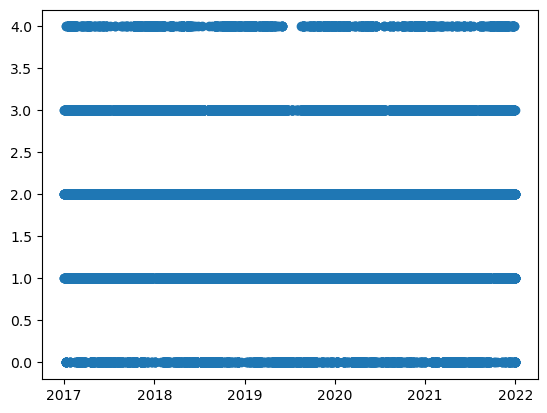

In [62]:
plt.scatter(df.UTC, df.Score)
plt.show

In [65]:
df['Swell Score'] = df[['Swell','Period']].sum(axis=1)

In [66]:
df.head()

,PST,Wind,Period,Tide,Swell,Score,UTC,Swell Score
0,2017-01-01 07:00:00-08:00,0,1,1,0,2,2017-01-01 15:00:00+00:00,1
1,2017-01-01 08:00:00-08:00,1,1,1,0,3,2017-01-01 16:00:00+00:00,1
2,2017-01-01 09:00:00-08:00,1,1,0,0,2,2017-01-01 17:00:00+00:00,1
3,2017-01-01 10:00:00-08:00,1,1,0,0,2,2017-01-01 18:00:00+00:00,1
4,2017-01-01 11:00:00-08:00,1,1,0,1,3,2017-01-01 19:00:00+00:00,2


In [80]:
df.drop(columns='PST').groupby(['Score', 'UTC']).sum().reset_index()

,Score,UTC,Wind,Period,Tide,Swell,Swell Score
0,0,2017-01-06 20:00:00+00:00,0,0,0,0,0
1,0,2017-01-07 18:00:00+00:00,0,0,0,0,0
2,0,2017-01-07 19:00:00+00:00,0,0,0,0,0
3,0,2017-01-07 20:00:00+00:00,0,0,0,0,0
4,0,2017-01-07 21:00:00+00:00,0,0,0,0,0
...,...,...,...,...,...,...,...
23845,4,2021-12-22 16:00:00+00:00,1,1,1,1,2
23846,4,2021-12-22 21:00:00+00:00,1,1,1,1,2
23847,4,2021-12-22 22:00:00+00:00,1,1,1,1,2
23848,4,2021-12-25 18:00:00+00:00,1,1,1,1,2


In [102]:
zero = df.Score == 0
one = df.Score == 1
two = df.Score == 2
three = df.Score == 3
four = df.Score == 4

In [152]:
#values of each group
bar0 = df[zero]['count'].groupby(df['UTC'].dt.year).sum()
bar1 = df[one]['count'].groupby(df['UTC'].dt.year).sum()
bar2 = df[two]['count'].groupby(df['UTC'].dt.year).sum()
bar3 = df[three]['count'].groupby(df['UTC'].dt.year).sum()
bar4 = df[four]['count'].groupby(df['UTC'].dt.year).sum()

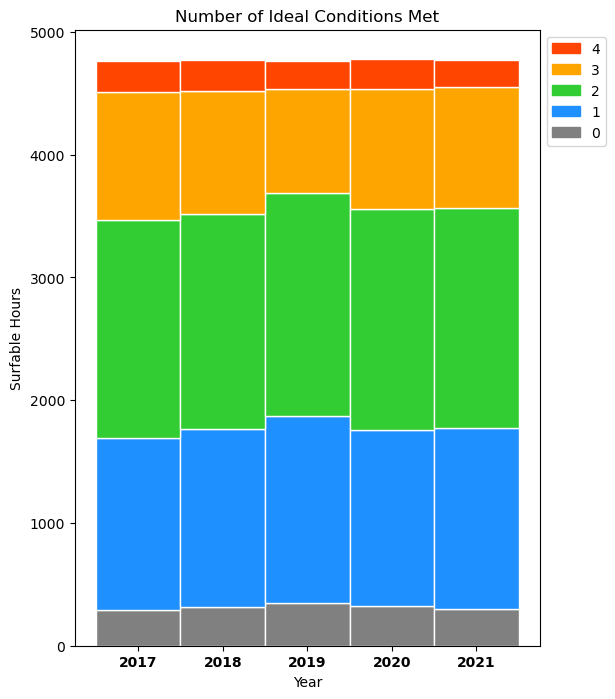

In [163]:
#position of bars on the x-axis
r = [0,1,2,3,4]

#names of group and bar width and edgecolor
names = ['2017','2018','2019','2020','2021']
bar_width = 1
edgecolor = 'white'

#bar heights
bar2_start = np.add(bar0,bar1).tolist()
bar3_start = np.add(bar2_start, bar2).tolist()
bar4_start = np.add(bar3_start, bar3).tolist()

plt.figure(figsize=(6,8))

#create zero bars
plt.bar(r, bar0, color='gray', edgecolor = edgecolor, width=bar_width)

#create one bars
plt.bar(r, bar1, bottom=bar0, color='dodgerblue', edgecolor = edgecolor, width=bar_width)

#create two bars
plt.bar(r, bar2, bottom=bar2_start, color='limegreen', edgecolor = edgecolor, width=bar_width)

#create three bars
plt.bar(r, bar3, bottom=bar3_start, color='orange', edgecolor = edgecolor, width=bar_width)

#create four bars
plt.bar(r, bar4, bottom=bar4_start, color='orangered', edgecolor = edgecolor, width=bar_width)

#custom x axis
plt.xticks(r,names, fontweight='bold')
plt.xlabel('Year')

plt.ylabel('Surfable Hours')

# Add a legend
gray = mpatches.Patch(color='gray', label='0')
blue = mpatches.Patch(color='dodgerblue', label='1')
green = mpatches.Patch(color='limegreen', label='2')
orange = mpatches.Patch(color='orange', label='3')
red = mpatches.Patch(color='orangered', label='4')
plt.legend(handles = [red,orange,green,blue,gray],loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.title('Number of Ideal Conditions Met', loc='center')

plt.show()


In [128]:
bar2_start = np.add(bar0,bar1).tolist()


In [129]:

bar3_start = np.add(bar2_start, bar2).tolist()


AttributeError: 'numpy.ndarray' object has no attribute 'to_list'

In [ ]:
bar4_start = np.add(bar3_start, bar3).tolist()

In [148]:
df[two]['count'].groupby(df['UTC'].dt.year).sum()

UTC
2017    1775
2018    1751
2019    1817
2020    1799
2021    1795
Name: count, dtype: int32

In [158]:
l = df[two]['count'].groupby(df['UTC'].dt.year).sum().index.to_list()

In [159]:
len(l)

5